In [1]:
! pip install opencv-python==3.4.2.17

! pip install opencv-contrib-python==3.4.2.17

In [2]:

import random
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Research/Thesis (4 - II)/Classification/Data/Jahid/Data.zip', 'r')
file = zip_ref.extractall("./tmp")
zip_ref.close()

print("o")

o


In [5]:
DATASET="/content/tmp"


In [6]:
CATEGORIES = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
        
train_data=[]
sift_data = []

# `SIFT`

In [7]:
from skimage import feature

def sift_image(image):
	# create SIFT feature extractor
    sift = cv2.xfeatures2d.SIFT_create()
    # detect features from the image
    keypoints, descriptors = sift.detectAndCompute(image, None)
    # draw the detected key points
    sift_image = cv2.drawKeypoints(image, keypoints, image)

    return sift_image
    

In [8]:
import os
import tensorflow as tf

import cv2

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv2.imread(os.path.join(path,img_file),1)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(224,224))
            sift_img =  sift_image(img)           
            train_data.append([img,label])
            sift_data.append([sift_img,label])
            

print(len(train_data))
print(len(sift_data))

3637
3637


In [9]:
random.shuffle(sift_data)
random.shuffle(sift_data)
random.shuffle(sift_data)
random.shuffle(sift_data)

In [10]:
for lbl in sift_data[:10]:
    print(lbl[1])

1
1
1
2
2
2
0
0
0
3


In [11]:
X, y = [], []
for features,label in sift_data:
    X.append(features)
    y.append(label)


In [12]:
len(X)

3637

In [13]:
# plt.imshow(hog_data[0][0])

In [14]:
X_arr = np.array(X)
X_arr = X_arr.reshape((-1, 224*224*3))
y_arr = np.array(y)
X_arr.shape, y_arr.shape

((3637, 150528), (3637,))

In [15]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(X_arr, y_arr, test_size=0.2, shuffle=True, random_state=9990)


In [16]:
Xtrain.shape

(2909, 150528)

# SVM

In [17]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

model_svm = SVC(kernel='rbf', class_weight='balanced')
model_svm.fit(Xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
model = model_svm

In [19]:
# model = grid.best_estimator_
yfit = model.predict(Xtest)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=CATEGORIES))

              precision    recall  f1-score   support

         CNV       0.69      0.70      0.69       177
         DME       0.60      0.62      0.61       196
      DRUSEN       0.61      0.56      0.58       200
      NORMAL       0.61      0.63      0.62       155

    accuracy                           0.63       728
   macro avg       0.63      0.63      0.63       728
weighted avg       0.63      0.63      0.63       728



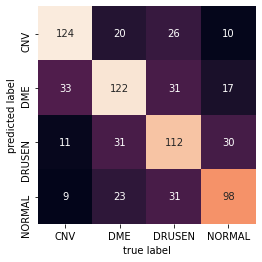

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=CATEGORIES,
            yticklabels=CATEGORIES)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [24]:
import pickle

a = {'hello': 'world'}

with open('/content/drive/MyDrive/sift_svm.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)


# `PCA With SVM` 

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model_pca_svm = make_pipeline(pca, svc)

In [ ]:
param_grid = {'svc__C': [50],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model_pca_svm, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

In [ ]:
model = model_pca_svm

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=CATEGORIES))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=CATEGORIES,
            yticklabels=CATEGORIES)
plt.xlabel('true label')
plt.ylabel('predicted label');